# Transform Coding

* Signals can be represented at least in two different domains: the signal domain (for example, time in the case of sound of space in the case of image) and the frequency domain.
* Transform coding is based on the idea that, in the frequency domain, most of the energy of the signal can be compacted in a small number of transform coefficients.
* This property can be interesting for increasing the coding efficiency.

## Encoder

1. Split $s$ into blocks of $B$ samples.
2. Transform each block.
3. Performs a bit-allocation procedure over the coefficientes.
4. Lossless encode the quantized coefficients.

## Decoder

1. Decode the coefficients of each block.
2. "Dequantize" the coefficients of each block.
3. Inverse-transform each block.
4. Join the blocks.

## Splitting

1. Divide $s=\{s[n]\}_{n=0}^{N-1}$ into blocks $\{s[n]\}_{n=0}^{B-1}$ of $B$ samples.

## Transform

* In the forward transform the samples of the block are correlated with (the block is compared to) a set of basis functions

  \begin{equation}
    \{S[k]\}_{k=0}^{B-1} = \sum_{n=0}^{B-1}a_{k,n}s[n].
    \tag{forward_transform}
  \end{equation}

* The backward (inverse) transform restores the original samples

  \begin{equation}
    \{s[n]\}_{n=0}^{B-1} = \sum_{k=0}^{B-1}b_{n,k}S[k].
    \tag{inverse_transform}
  \end{equation}
  
* These equations can be written in matrix form as
  
  \begin{equation}
    S=As
    \tag{forward_transform_matrix_form}
  \end{equation}
  
  \begin{equation}
    s=BS,
    \tag{inverse_transform_matrix_form}
  \end{equation}
  
  where $A$ and $B$ are matrices, being
  
  \begin{equation}
    \begin{array}{l}
    [A]_{k,n} = a_{k,n} \\
    [B]_{n,k} = b_{n,k}.
    \end{array}
  \end{equation}
  
* In transform coding, $A$ and $B$ must be inverses of each other ($B=A^{-1}$), i.e.

  \begin{equation}
    AB = BA = I,
  \end{equation}
  
  where $I$ is the identity matrix.

## Orthogonal transform

* The rows of $A$ ($a_{k,*}$) are refered to as the *basis vectors* of the transform, and form an *orthogonal* basis set. The rows can be also seen as the coefficients of $B$ filters, being the first one ($i=0$) the "low-pass" one, which will produce the DC coefficient, and the rest ($i\geq 1$) the "high-pass" filters,  which will generate the AC (Alternating Current) coeffs. These $B$ filters form a filter-bank where the overlapping between the frequency response of the filters should be as small as possible if we want maximum energy compaction.

## Orthonormal transform

* If the basis vectors of a orthogonal transform are unit vectors, the transform is said orthonoral.

* For orthonormal transforms, it holds that

  \begin{equation}
    A^{-1} = A^T.
  \end{equation}

  Therefore, the pair of transforms can be written as
  
  \begin{equation}
    \begin{array}{l}
      S=As \\
      s=A^TS.
    \end{array}
  \end{equation}

## Unitary transform

* Orthonormal transforms are energy preserving and therefore, unitary:

  \begin{equation}
    \sum_{k=0}^{B-1} S[k]^2 = \sum_{n=0}^{B-1}s[n]^2.
  \end{equation}
  
### Proof

\begin{equation}
  \sum_{k=0}^{B-1} S[k]^2 = S^TS = (As)^TAs = s^TA^TAs = s^TIs = s^Ts = \sum_{n=0}^{B-1}s[n]^2.
\end{equation}

## Coding gain

* The coding gain measures the compaction level of the transform, which is defined as

  \begin{equation}
    G=\frac{\frac{1}{B}\displaystyle\sum_{m=0}^{B-1}\sigma_{S[k]}^2}{\sqrt[B]{\displaystyle\prod_{m=0}^{B-1}\sigma_{S[k]}^2}},
  \end{equation}
  
  where $\sigma_{S[k]}^2$ is the variance of coeff $S[k]$.

## Karhunen-Loéve transform (KLT)

* For the KLT, the rows of $A$ (the basis of the forward transform) are the eigenvectors of the autorrelation matrix $R$ of the signal $s$. The $(i,j)$-th element of $R$ is defined as:

  \begin{equation}
    R_{i,j} = \text{E}\big(s[n]s[n+|i-j|]\big).
  \end{equation}
  
* It can be proven that KLT minimizes $\sqrt[B]{\prod_{k=0}^{B-1}\sigma_{S[k]}^2}$, and therefore, it provides the maximum coding gain. Unfortunately, the basis fuctions of the KLT depends on $s$ if it is non-[stationary](https://en.wikipedia.org/wiki/Stationary_process) and in this case, the autocorrelation matrix (or the basis) must be sent to the decoder (to run the inverse transform) as side information. However, if $B=2$, the KLT is

  \begin{equation}
    A_{\text{2-KLT}} = \frac{1}{\sqrt{2}}
    \left[
      \begin{array}{cc}
        1 & 1 \\
        1 & -1
      \end{array}
    \right]
  \end{equation}
  
  for all signals.

## Quantization in the transform domain

* If the transform is orthogonal, by definition coeffs $S[k]$ are uncorrelated. Therefore, a scalar quantizer can performs an optimal quantization.

## Bit allocation (bit-rate control)

* In lossless coding, coeffs $S[k]$ are directly encoded using some text compression algorithm or a combination of them.

* However, in most situations, a lossy compression is needed and in this case, a transform coder must determine, given a maximum number of bits $R^\text{max}$ (which is defined by the compression ratio selected by the user), the number of bits $R_k$ used by the quantizer for each coeff $S[k]$.

## Bit allocation based on minimizing the quantization error

* In unitary transforms, as a consequence of the energy preserving property, an uniform quantization (i.e. the dividing each coeff $S[k]$ by the same quantization step) should provide optimal bit allocation if we want to minimize the quantization error (the distortion) in the recostructed signal $s$.

## Bit allocation based on minimizing the variance of the quantization error

* Lets assume that the variance of the coeffs, defined as

  \begin{equation}
    \sigma_{S[k]}^2 = \text{E}\big( (S[k] - \overline{S})^2\big)
   \end{equation}
   
   (where
   
   \begin{equation}
     \overline{S} = \text{E}(S) = \frac{1}{B}\sum_{k=0}^{B-1} S[k])
   \end{equation}
   
  corresponds to the amount of information provided by each coeff. Therefore, coeffs with high variance should be assigned more bits and viceversa.

* Lets define

  <a id='target_bit_average'></a>
  \begin{equation}
    {\overline{R}} = \frac{1}{B}\sum_{k=0}^{B-1}R_k
    \tag{$\overline{R}$}
  \end{equation}
  
  as the (target) average number of bits/coeff, where $R_k$ is the number of bits assigned to coeff $S[k]$.

* If the mean square error is as a measure of distortion, the variance of the distortion generated by the quantization of a coeff $S[k]$ [can be modeled](http://cdn.intechopen.com/pdfs/16267/InTech-Rate_control_in_video_coding.pdf) by

  \begin{equation}
    \sigma_{S[k]-\tilde{S}[k]}^2=\alpha_{k}2^{-2R_k}\sigma_{S[k]}^2,
  \end{equation}
  
  where $\alpha_{k}$ depends on the frequency $k$ and the quantizer. 

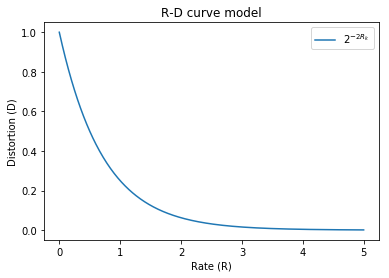

In [11]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 500)
plt.plot(x, 2**(-2*x), label=r'$2^{-2R_k}$')
plt.title('R-D curve model')
plt.xlabel('Rate (R)')
plt.ylabel('Distortion (D)')
plt.legend()

* Assuming an additive distorion metric, the total distortion variance for $R_k$ bits/coeff is given by

  \begin{equation}
    D = \sigma_{S-\tilde{S}}^2 = \sum_{k=0}^{B-1} \sigma_{S[k]-\tilde{S}[k]}^2 = \sum_{k=0}^{B-1}\alpha _{k}2^{-2R_k}\sigma_{S[k]}^2 = \alpha\sum_{k=0}^{B-1}2^{-2R_k}\sigma_{S[k]}^2
    \tag{$D$}
  \end{equation},
  
  supposing that $\alpha_{S[k]} = \alpha$ is constant for all coeffs (a valid supposition for unitary transforms because the quantization error generated in each coeff should be the same if an uniform quantizer is used).
  
* The objective of the bit-allocation process is to find the $\{R_k\}_{k=0}^{B-1}$ so that minimize $D$ subject to constraint $\overline{R}$:

  \begin{equation}
    \underset{\{R_k\}_{k=0}^{B-1}}{\operatorname{arg min}} D, \text{s.t.}~{\overline{R}}. 
  \end{equation}

* This is an optimization problem that can be solved using [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) (note: the following development is not the "standard" way of using Lagrenge multipliear, but it is equivalent).

* Lets define the Lagrangian functional

  \begin{equation}
    J = D - \lambda\Big( \overline{R} - \frac{1}{B}\sum_{k=0}^{B-1}R_k \Big)= \alpha \sum_{k=0}^{B-1} 2^{-2R_k}\sigma_{S[k]}^2 - \lambda \Big( \overline{R} - \frac{1}{B}\sum_{k=0}^{B-1}R_k \Big),
  \end{equation}
  
 which taking

  \begin{equation}
    \frac{\partial J}{\partial R_k} = 0
  \end{equation}
  
 produces that
  
  \begin{equation}
    R_k = \frac{1}{2}\log_2\big( 2\alpha\ln 2\sigma_{S[k]}^2 \big) - \frac{1}{2}\log_2\lambda.
    \tag{$R_k(\lambda)$}
  \end{equation}
  
* Substituting $R_k$ in Eq. ($\overline{R}$), we get that

  \begin{equation}
    \overline{R} = \frac{1}{B}\sum_{k=0}^{B-1}\frac{1}{2}\log_2\big( 2\alpha\ln 2\sigma_{S[k]}^2 \big) - \frac{1}{2}\log_2\lambda.
  \end{equation}
  
* Operating

  \begin{equation}
    \lambda = \prod_{k=0}^{B-1}\sqrt[B]{2\alpha\ln 2\sigma_{S[k]}^2} - 2^{-2\overline{R}}.
  \end{equation}
  
* Substituting $\lambda$ in Eq. ($R_k(\lambda)$), we obtain the optimal number of bits for each coeff

  \begin{equation}
    R_k = \overline{R} + \frac{1}{2}\log_2\frac{\sigma_{S[k]}^2}{\displaystyle\prod_{k=0}^{B-1}\sqrt[B]{\sigma_{S[k]}^2}}.
  \end{equation}
  
  which minimizes the variance of the quantization error. Notice that this value depends proportionally on $\overline{R}$ (the target average bits/coeff), logaritmically on $\sigma_{S[k]^2}$ (the variance of the coeff) and log-inversely on the geometric mean of the variances of all coeffs.

## Encoding

* Usually ZigZag-RLE followed by 0-order entropy coding.